In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
df = pd.read_csv("premier_league_adjusted.csv")

In [11]:
df.head()

,Week,Date,Time,Home_Team,Home_xG,Score,Away_xG,Away_Team,Attendance,Venue,Referee
0,1,2022-08-05,20:00:00,Crystal Palace,1.2,0–2,1.0,Arsenal,25286.0,Selhurst Park,Anthony Taylor
1,1,2022-08-06,12:30:00,Fulham,1.2,2–2,1.2,Liverpool,22207.0,Craven Cottage,Andy Madley
2,1,2022-08-06,15:00:00,Tottenham,1.5,4–1,0.5,Southampton,61732.0,Tottenham Hotspur Stadium,Andre Marriner
3,1,2022-08-06,15:00:00,Newcastle Utd,1.7,2–0,0.3,Nott'ham Forest,52245.0,St James' Park,Simon Hooper
4,1,2022-08-06,15:00:00,Leeds United,0.8,2–1,1.3,Wolves,36347.0,Elland Road,Robert Jones


In [12]:
df.shape

(1900, 11)

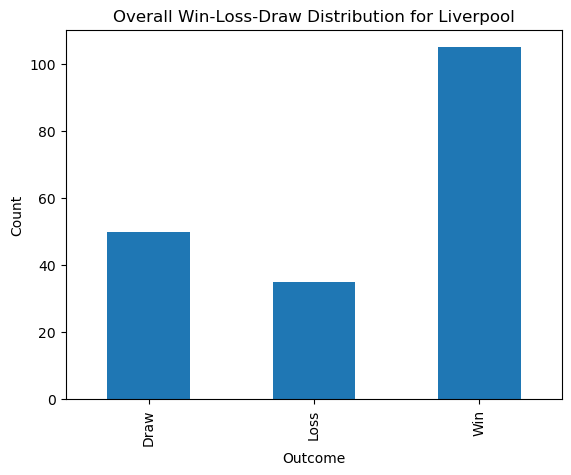

In [25]:
# Define a function to determine match outcome (win, loss, draw)
def match_outcome(row):
    home_score, away_score = map(int, list(row['Score'].replace('–', '')))
    if home_score > away_score:
        return 'Win'
    elif home_score < away_score:
        return 'Loss'
    else:
        return 'Draw'

# Apply the function to each row to create a new column 'Outcome'
df['Outcome'] = df.apply(match_outcome, axis=1)

# Group the data by 'Home_Team' and count the outcomes
team_outcomes_home = df.groupby('Home_Team')['Outcome'].value_counts().unstack().fillna(0)

# Group the data by 'Away_Team' and count the outcomes
team_outcomes_away = df.groupby('Away_Team')['Outcome'].value_counts().unstack().fillna(0)

# Sum the results for each team to get the overall win-loss-draw distribution
team_results = team_outcomes_home + team_outcomes_away

# Plot the distribution for a specific team (replace 'Liverpool' with the team of interest)
team_name = 'Liverpool'
team_results.loc[team_name].plot(kind='bar', stacked=True)
plt.title(f'Overall Win-Loss-Draw Distribution for {team_name}')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [26]:
# Calculate average home xG for each team
avg_home_xg = df.groupby('Home_Team')['Home_xG'].mean()

# Calculate average away xG for each team
avg_away_xg = df.groupby('Away_Team')['Away_xG'].mean()

# Find the team with the highest average home xG
highest_home_xg_team = avg_home_xg.idxmax()
highest_home_xg_value = avg_home_xg.max()

# Find the team with the lowest average home xG
lowest_home_xg_team = avg_home_xg.idxmin()
lowest_home_xg_value = avg_home_xg.min()

# Find the team with the highest average away xG
highest_away_xg_team = avg_away_xg.idxmax()
highest_away_xg_value = avg_away_xg.max()

# Find the team with the lowest average away xG
lowest_away_xg_team = avg_away_xg.idxmin()
lowest_away_xg_value = avg_away_xg.min()

print(f"Highest Average Home xG: {highest_home_xg_team} ({highest_home_xg_value:.2f})")
print(f"Lowest Average Home xG: {lowest_home_xg_team} ({lowest_home_xg_value:.2f})")
print(f"Highest Average Away xG: {highest_away_xg_team} ({highest_away_xg_value:.2f})")
print(f"Lowest Average Away xG: {lowest_away_xg_team} ({lowest_away_xg_value:.2f})")

Highest Average Home xG: Newcastle Utd (2.29)
Lowest Average Home xG: Crystal Palace (1.06)
Highest Average Away xG: Manchester City (1.90)
Lowest Average Away xG: Wolves (0.83)
